In [3]:
!pip install seaborn --quiet

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('./data/synthetic_keylock_data.csv')

# Basic information about the dataset
print(df.info())
print("\nSample of first few rows:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               10000 non-null  object 
 1   user_id                 10000 non-null  object 
 2   lock_id                 10000 non-null  object 
 3   access_level            10000 non-null  object 
 4   access_granted          10000 non-null  bool   
 5   access_duration         10000 non-null  float64
 6   failed_attempts         10000 non-null  int64  
 7   day_of_week             10000 non-null  int64  
 8   hour                    10000 non-null  int64  
 9   is_weekend              10000 non-null  bool   
 10  is_business_hours       10000 non-null  bool   
 11  is_anomaly              10000 non-null  bool   
 12  time_since_last_access  9999 non-null   float64
 13  user_access_count       10000 non-null  int64  
 14  lock_access_count       10000 non-null 

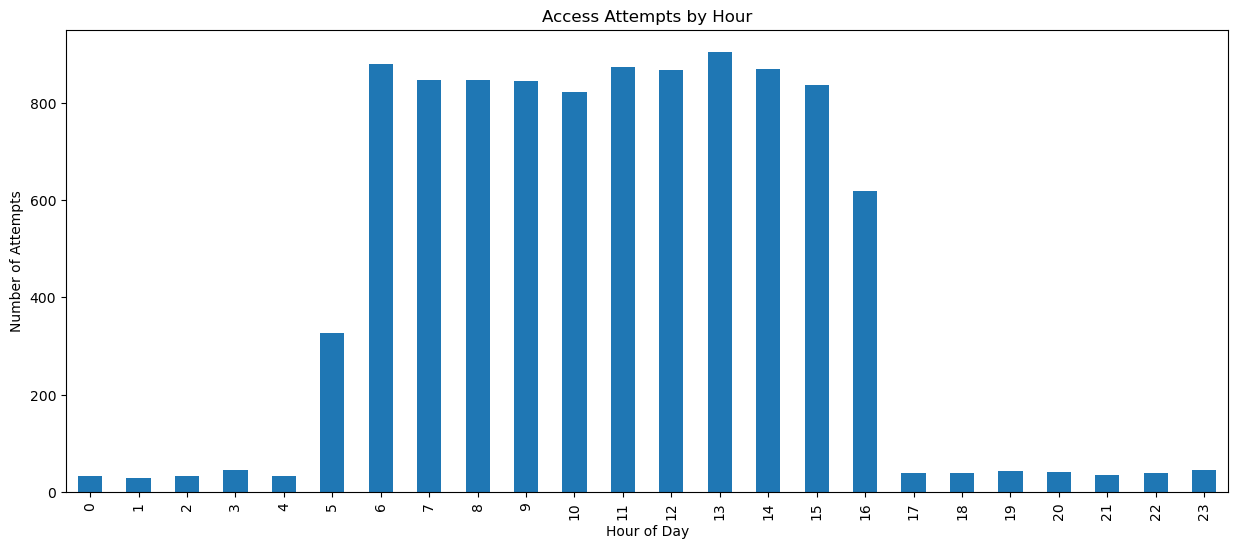

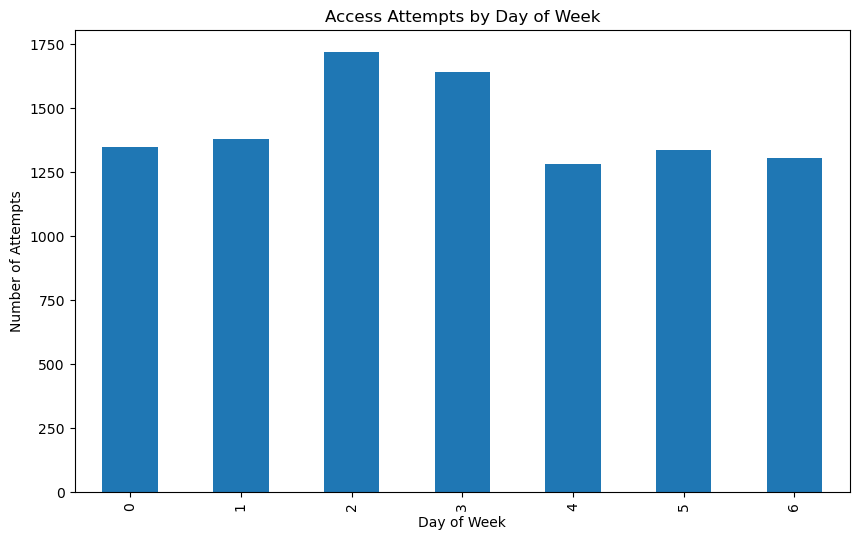

In [5]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Access patterns over time
plt.figure(figsize=(15, 6))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Access Attempts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Attempts')
plt.show()

# Access patterns by day of week
plt.figure(figsize=(10, 6))
df['day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title('Access Attempts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Attempts')
plt.show()


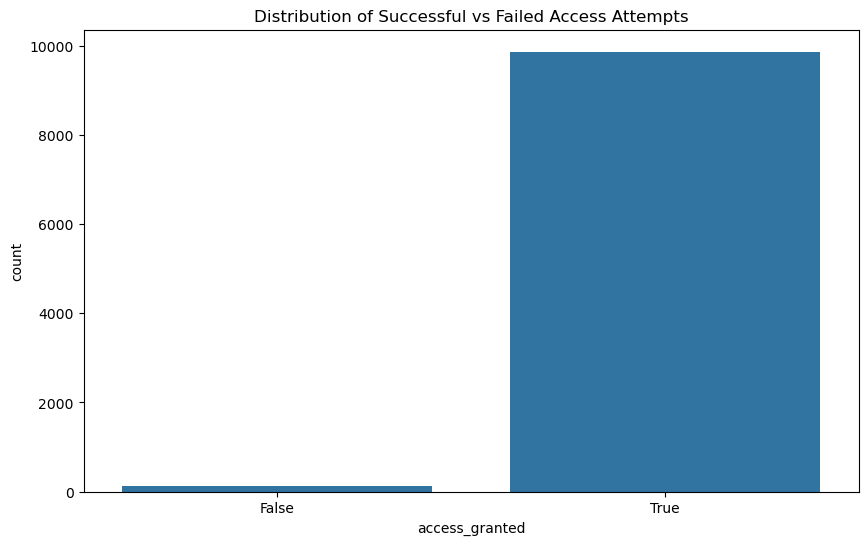

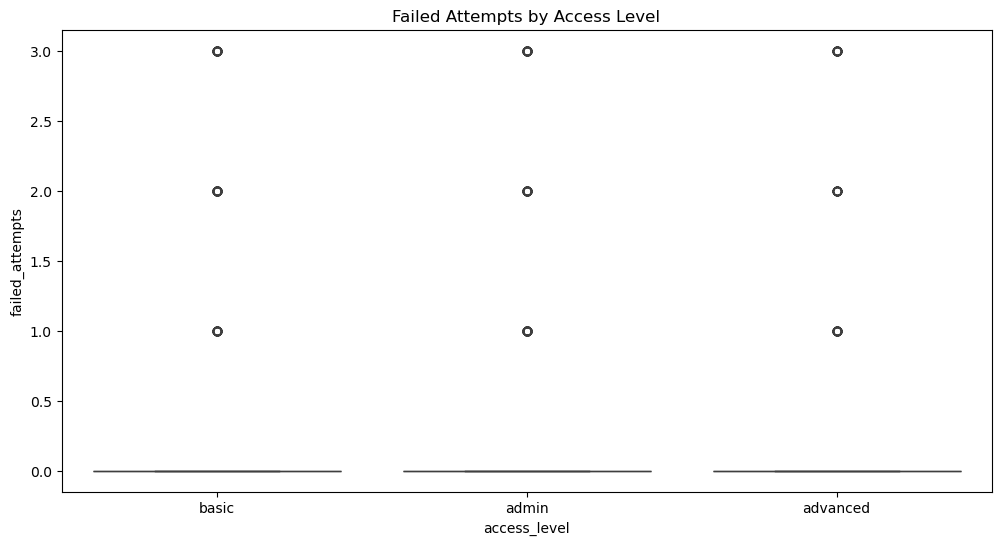

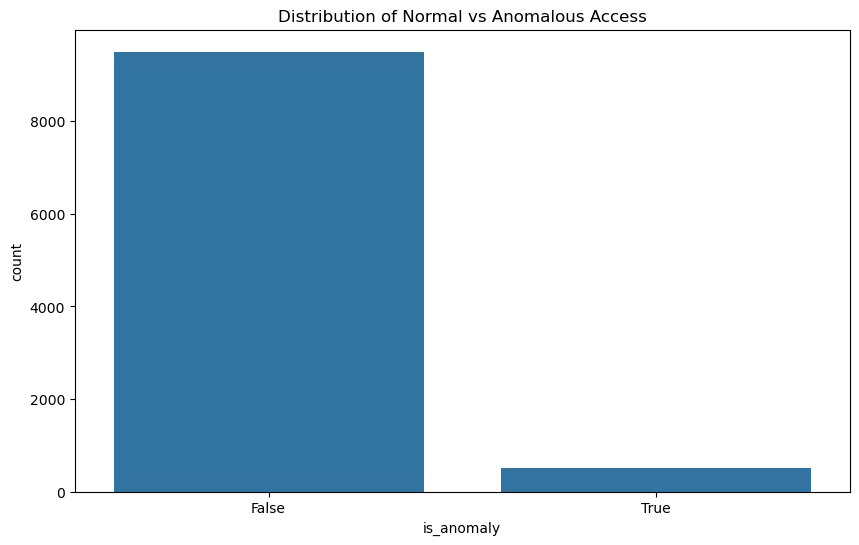

In [6]:
# Access success rate analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='access_granted')
plt.title('Distribution of Successful vs Failed Access Attempts')
plt.show()

# Failed attempts analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='access_level', y='failed_attempts')
plt.title('Failed Attempts by Access Level')
plt.show()

# Anomaly distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='is_anomaly')
plt.title('Distribution of Normal vs Anomalous Access')
plt.show()


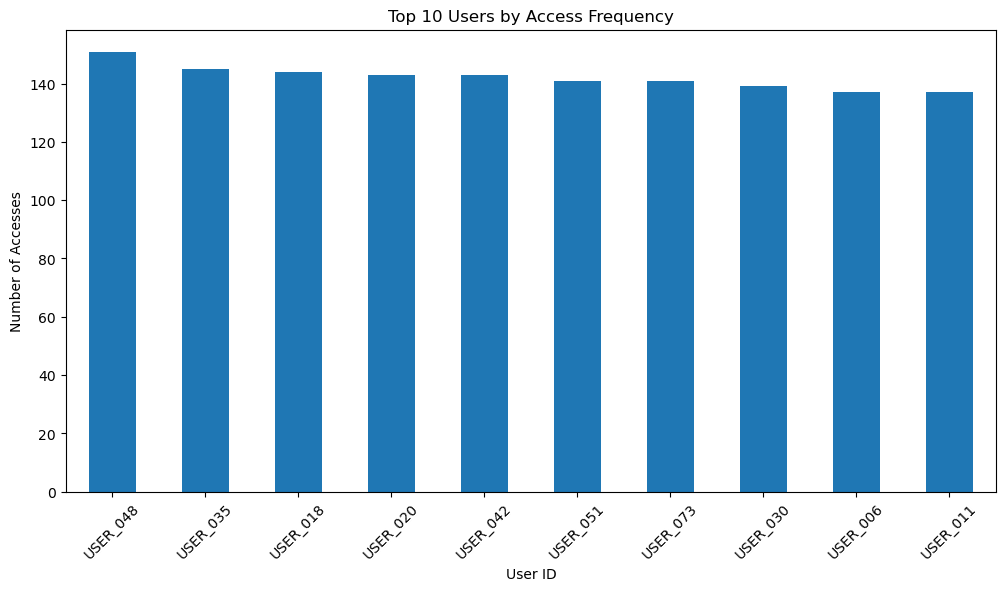

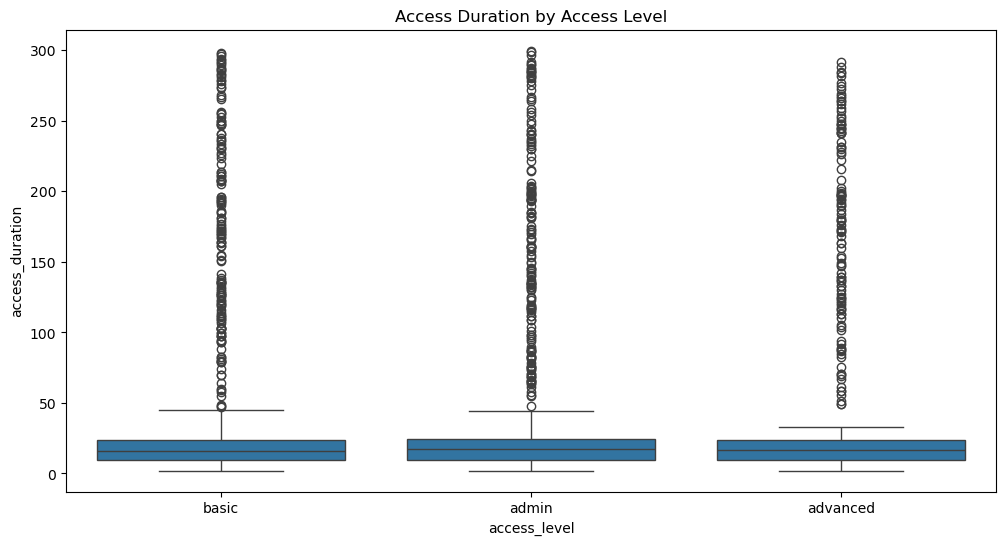

In [7]:
# Top users by access frequency
plt.figure(figsize=(12, 6))
df['user_id'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Users by Access Frequency')
plt.xlabel('User ID')
plt.ylabel('Number of Accesses')
plt.xticks(rotation=45)
plt.show()

# Access duration patterns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='access_level', y='access_duration')
plt.title('Access Duration by Access Level')
plt.show()


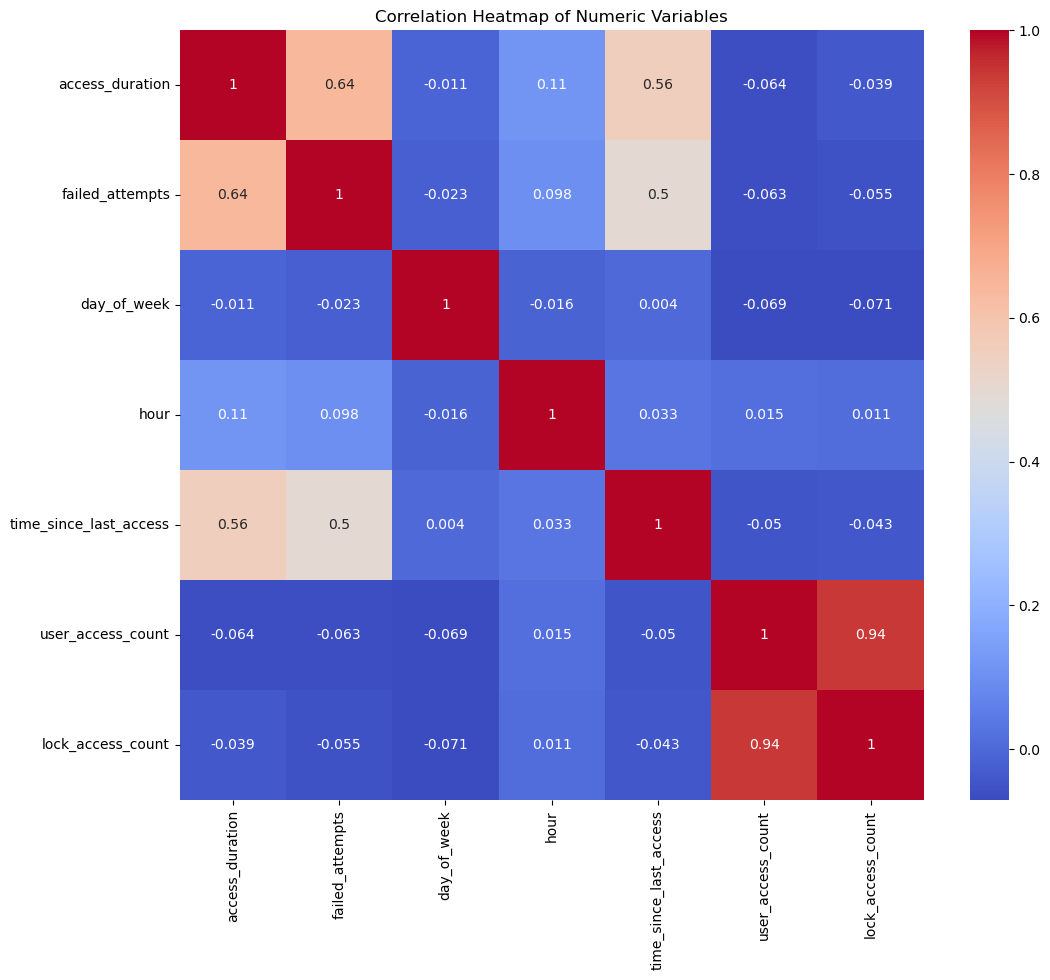

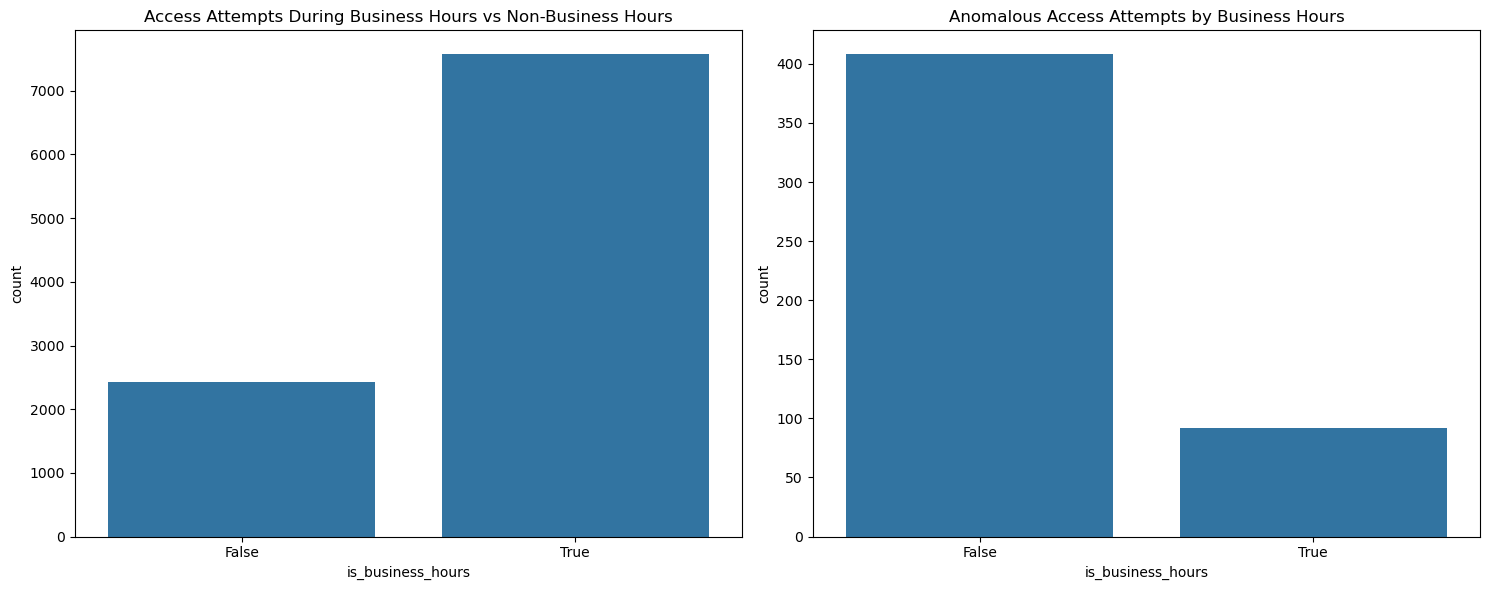

In [8]:
# Create a heatmap of correlations
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# Business hours vs non-business hours analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(data=df, x='is_business_hours', ax=ax1)
ax1.set_title('Access Attempts During Business Hours vs Non-Business Hours')

sns.countplot(data=df[df['is_anomaly']], x='is_business_hours', ax=ax2)
ax2.set_title('Anomalous Access Attempts by Business Hours')
plt.tight_layout()
plt.show()


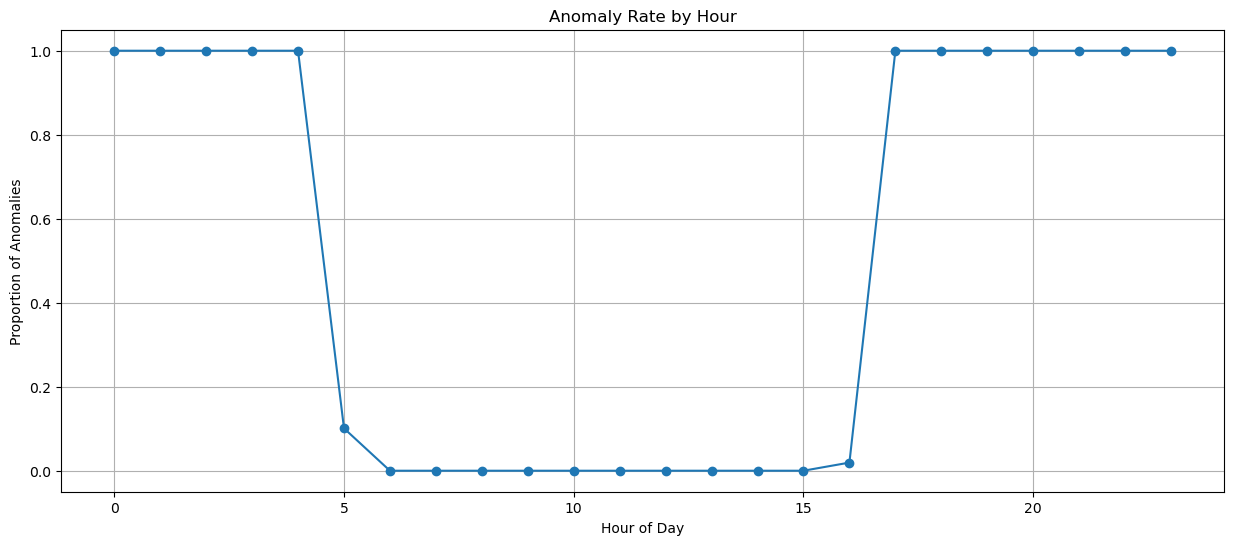

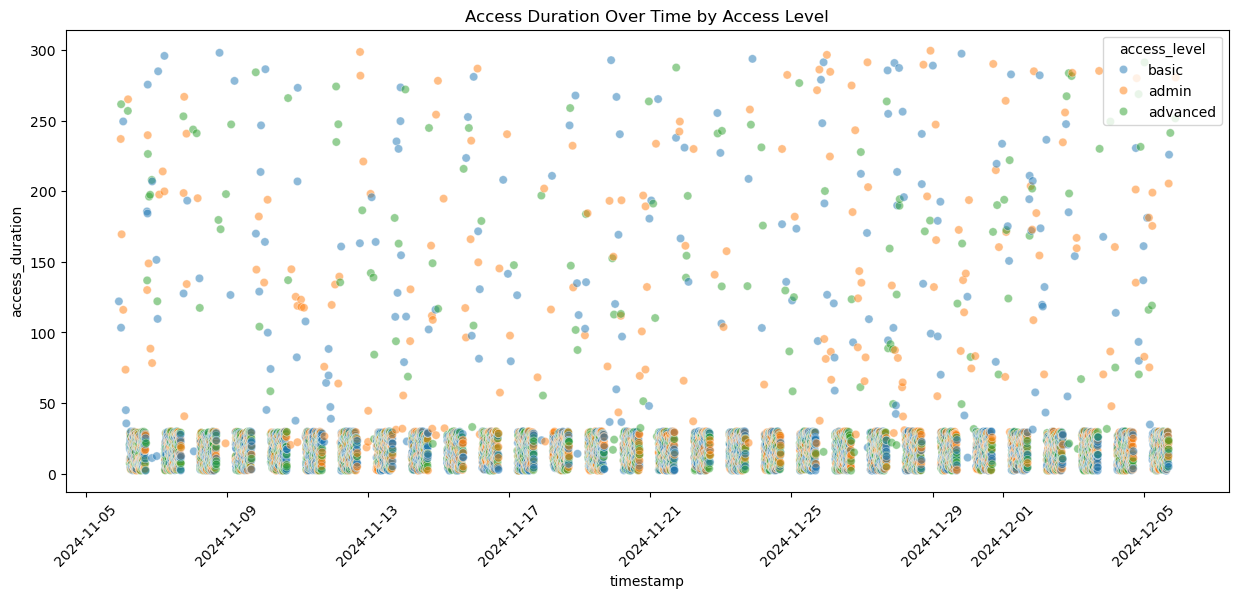

In [9]:
# Create time-based visualizations
plt.figure(figsize=(15, 6))
df.groupby('hour')['is_anomaly'].mean().plot(kind='line', marker='o')
plt.title('Anomaly Rate by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of Anomalies')
plt.grid(True)
plt.show()

# Access duration patterns over time
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='timestamp', y='access_duration', 
                hue='access_level', alpha=0.5)
plt.title('Access Duration Over Time by Access Level')
plt.xticks(rotation=45)
plt.show()


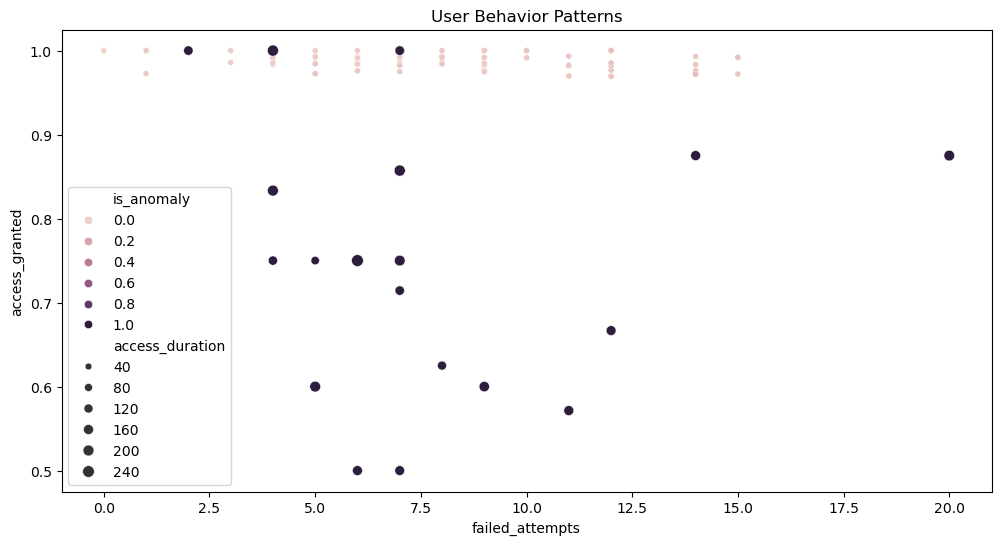

In [10]:
# Create a summary of user behavior
user_summary = df.groupby('user_id').agg({
    'access_granted': 'mean',
    'failed_attempts': 'sum',
    'access_duration': 'mean',
    'is_anomaly': 'mean'
}).reset_index()

# Visualize user behavior patterns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=user_summary, 
                x='failed_attempts', 
                y='access_granted',
                size='access_duration',
                hue='is_anomaly')
plt.title('User Behavior Patterns')
plt.show()
